# Perform Exploratory Data Analysis

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [56]:
df = pd.read_csv('kc_house_data.csv')

In [57]:
df.head().T

,0,1,2,3,4
id,7129300520,6414100192,5631500400,2487200875,1954400510
date,10/13/2014,12/9/2014,2/25/2015,12/9/2014,2/18/2015
price,221900,538000,180000,604000,510000
bedrooms,3,3,2,4,3
bathrooms,1,2.25,1,3,2
sqft_living,1180,2570,770,1960,1680
sqft_lot,5650,7242,10000,5000,8080
floors,1,2,1,1,1
waterfront,NaN,0,0,0,0
view,0,0,0,0,0


In [58]:
len(df)

21597

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [61]:
df[df['sqft_basement'] == '?'] = np.nan
df['sqft_basement'] = df['sqft_basement'].map(float)

In [62]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7.129301e+09,10/13/2014,221900.0,3.0,1.00,1180.0,5650.0,1.0,NaN,0.0,...,7.0,1180.0,0.0,1955.0,0.0,98178.0,47.5112,-122.257,1340.0,5650.0
1,6.414100e+09,12/9/2014,538000.0,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,...,7.0,2170.0,400.0,1951.0,1991.0,98125.0,47.7210,-122.319,1690.0,7639.0
2,5.631500e+09,2/25/2015,180000.0,2.0,1.00,770.0,10000.0,1.0,0.0,0.0,...,6.0,770.0,0.0,1933.0,NaN,98028.0,47.7379,-122.233,2720.0,8062.0
3,2.487201e+09,12/9/2014,604000.0,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,...,7.0,1050.0,910.0,1965.0,0.0,98136.0,47.5208,-122.393,1360.0,5000.0
4,1.954401e+09,2/18/2015,510000.0,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,...,8.0,1680.0,0.0,1987.0,0.0,98074.0,47.6168,-122.045,1800.0,7503.0


In [63]:
df.isna().sum()

id                454
date              454
price             454
bedrooms          454
bathrooms         454
sqft_living       454
sqft_lot          454
floors            454
waterfront       2793
view              515
condition         454
grade             454
sqft_above        454
sqft_basement     454
yr_built          454
yr_renovated     4208
zipcode           454
lat               454
long              454
sqft_living15     454
sqft_lot15        454
dtype: int64

In [64]:
df = df.dropna(subset=['id'])

In [ ]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2339
view               61
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3754
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

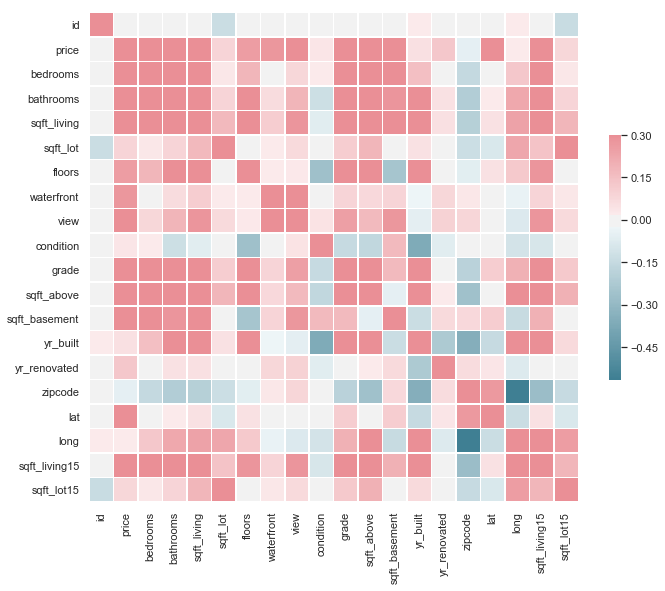

In [66]:
import seaborn as sns

sns.set(style='white')
corr = df.corr()
mask = np.zeros_like(corr,dtype=np.bool)

fig, ax = plt.subplots(figsize=(11,9))
cmap = sns.diverging_palette(220,10,as_cmap=True)

sns.heatmap(corr,mask=mask,cmap=cmap,vmax=.3,center=0,square=True,linewidth=.5,cbar_kws={'shrink':.5})